In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///data/birds_db")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['birdmetadata', 'birds']

In [8]:
metadata = Base.classes.birdmetadata
birds = Base.classes.birds

In [9]:
#Thanks chat GPT
from sqlalchemy.orm import sessionmaker

# Create a sessionmaker object
Session = sessionmaker(bind=engine)

# Create a session
session = Session()

In [10]:
# Design a query to retrieve the last 12 months of observation data and plot the results. 

In [11]:
# Starting from the most recent data point in the database. 
recent_date = session.query(birds.OBSERVATION_DATE).order_by(birds.OBSERVATION_DATE.desc()).first()
print(recent_date)

('2023-02-28',)


In [12]:
# Calculate the date one year from the last date in data set.
one_year = dt.date(2023, 2, 28) - dt.timedelta(days=365)
print(one_year)

2022-02-28


In [13]:
# Perform a query to retrieve the data and observations

obs = session.query(birds.OBSERVATION_DATE, birds.OBSERVATION_COUNT).\
    filter(birds.OBSERVATION_DATE > one_year).\
    order_by(birds.OBSERVATION_DATE).all()

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
obs_df = pd.DataFrame(obs)
obs_df.set_index('OBSERVATION_DATE')
obs_df

,OBSERVATION_DATE,OBSERVATION_COUNT
0,2022-03-01,1.0
1,2022-03-01,1.0
2,2022-03-01,2.0
3,2022-03-01,1.0
4,2022-03-01,5.0
...,...,...
106688,2023-02-28,1.0
106689,2023-02-28,1.0
106690,2023-02-28,1.0
106691,2023-02-28,2.0


In [16]:
obs_df['OBSERVATION_DATE'].value_counts().sort_values(ascending=False)

2022-05-07    2609
2022-05-14    2248
2022-05-08    1443
2022-05-10    1440
2022-05-11    1436
              ... 
2022-12-22      32
2022-10-25      29
2022-12-14      26
2023-02-22      20
2022-12-23      14
Name: OBSERVATION_DATE, Length: 365, dtype: int64

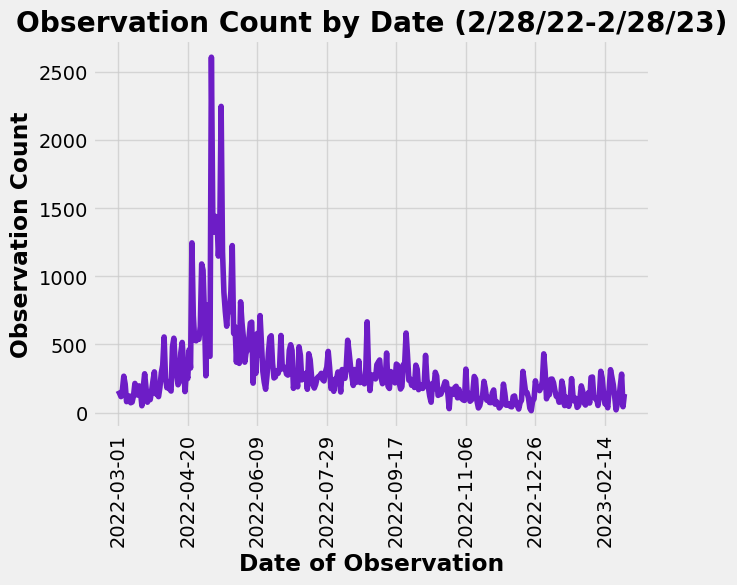

In [32]:
# Display observations in a Graph 
obs_df = pd.DataFrame(obs)
obs_df_counts = obs_df['OBSERVATION_DATE'].value_counts().sort_index()
obs_df_counts.plot(kind='line', x='OBSERVATION_DATE', y='count', color= "#6D1DC6")
plt.xlabel('Date of Observation', fontweight= "bold")
plt.xticks(rotation=90)
plt.ylabel('Observation Count', fontweight= "bold")
plt.title('Observation Count by Date (2/28/22-2/28/23)', fontweight= "bold")
plt.grid(alpha=.75)
plt.show()